# Installing LazyPredict Library

In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('/kaggle/input/gold-price-and-relevant-metrics/Gold Price Prediction.csv')
df

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
0,8/7/24,2405.87,2384.90,2385.83,NaN,NaN,NaN,30.16,2414.74,2368.29,...,3.00,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,NaN,29.42,2414.15,2367.79,...,3.00,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,NaN,28.34,2413.23,2367.16,...,3.00,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,NaN,28.62,2411.09,2365.72,...,3.00,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,NaN,26.08,2408.57,2363.56,...,3.00,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,1/7/22,1810.28,1791.61,1796.41,1801.52,5.11,38.17,NaN,450.82,180.33,...,7.50,0.10,71,0.05,0.87,1.76,96.26,4697.66,19.85,79.62
672,1/6/22,1813.88,1810.28,1791.61,1796.41,4.80,47.40,NaN,361.00,144.40,...,7.50,0.10,73,0.04,0.88,1.73,96.20,4693.39,20.29,77.24
673,1/5/22,1804.27,1813.88,1810.28,1791.61,-18.67,28.30,NaN,271.42,108.57,...,7.50,0.10,74,0.05,0.83,1.71,96.31,4787.99,17.07,77.18
674,1/4/22,1815.73,1804.27,1813.88,1810.28,-3.60,0.45,NaN,180.91,72.36,...,7.50,0.10,74,0.06,0.77,1.66,96.19,4804.51,16.57,76.02


# Exploratory Data Analysis (EDA)

In [4]:
df = df.replace('NaN', np.nan)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    676 non-null    object 
 1   Price 2 Days Prior                      676 non-null    float64
 2   Price 1 Day Prior                       676 non-null    float64
 3   Price Today                             676 non-null    float64
 4   Price Tomorrow                          675 non-null    float64
 5   Price Change Tomorrow                   675 non-null    float64
 6   Price Change Ten                        666 non-null    float64
 7   Std Dev 10                              667 non-null    float64
 8   Twenty Moving Average                   676 non-null    float64
 9   Fifty Day Moving Average                676 non-null    float64
 10  200 Day Moving Average                  676 non-null    float6

In [6]:
df.describe()

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
count,676.00,676.00,676.00,675.00,675.00,666.00,667.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00,676.00
mean,1956.24,1957.11,1957.94,1958.17,0.86,8.94,21.00,1924.07,1871.38,1622.59,5.41,3.68,94.67,3.89,3.98,3.65,103.85,4419.90,19.88,84.38
std,192.96,193.56,194.20,194.25,17.53,55.68,10.47,265.47,345.30,540.44,2.25,2.00,15.58,2.00,1.07,0.77,3.44,499.22,6.05,11.86
min,1627.04,1627.04,1627.04,1627.04,-81.89,-124.29,5.59,90.21,36.09,9.02,3.00,0.08,41.00,0.02,0.77,1.63,94.87,3520.37,11.53,66.62
25%,1823.59,1824.49,1824.49,1824.88,-9.10,-29.54,13.67,1827.78,1798.10,1567.17,3.20,2.33,83.00,2.37,3.40,3.27,102.30,4025.43,14.23,76.56
50%,1930.91,1931.40,1931.51,1931.59,0.66,2.87,18.31,1927.93,1919.62,1814.99,4.90,4.83,95.00,4.70,4.36,3.81,103.99,4343.60,19.07,81.03
75%,2021.45,2022.29,2023.98,2024.08,10.87,42.33,25.87,2010.72,1993.31,1954.03,7.90,5.33,104.00,5.51,4.73,4.23,105.39,4715.93,24.05,88.77
max,2469.65,2469.65,2469.65,2469.65,66.66,186.17,62.18,2414.74,2368.29,2189.81,9.10,5.33,144.00,6.02,5.19,4.98,114.19,5644.09,37.50,124.66


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Date                                       0
Price 2 Days Prior                         0
Price 1 Day Prior                          0
Price Today                                0
Price Tomorrow                             1
Price Change Tomorrow                      1
Price Change Ten                          10
Std Dev 10                                 9
Twenty Moving Average                      0
Fifty Day Moving Average                   0
200 Day Moving Average                     0
Monthly Inflation Rate                     0
EFFR Rate                                  0
Volume                                     0
Treasury Par Yield Month                   0
Treasury Par Yield Two Year                0
Treasury Par Yield Curve Rates (10 Yr)     0
DXY                                        0
SP Open                                    0
VIX                                        0
Crude                                      0
dtype: int64

# Preprocessing & Visualization

In [9]:
df = df.dropna()

In [10]:
df = df.drop("Date", axis=1)

In [11]:
df.shape

(657, 20)

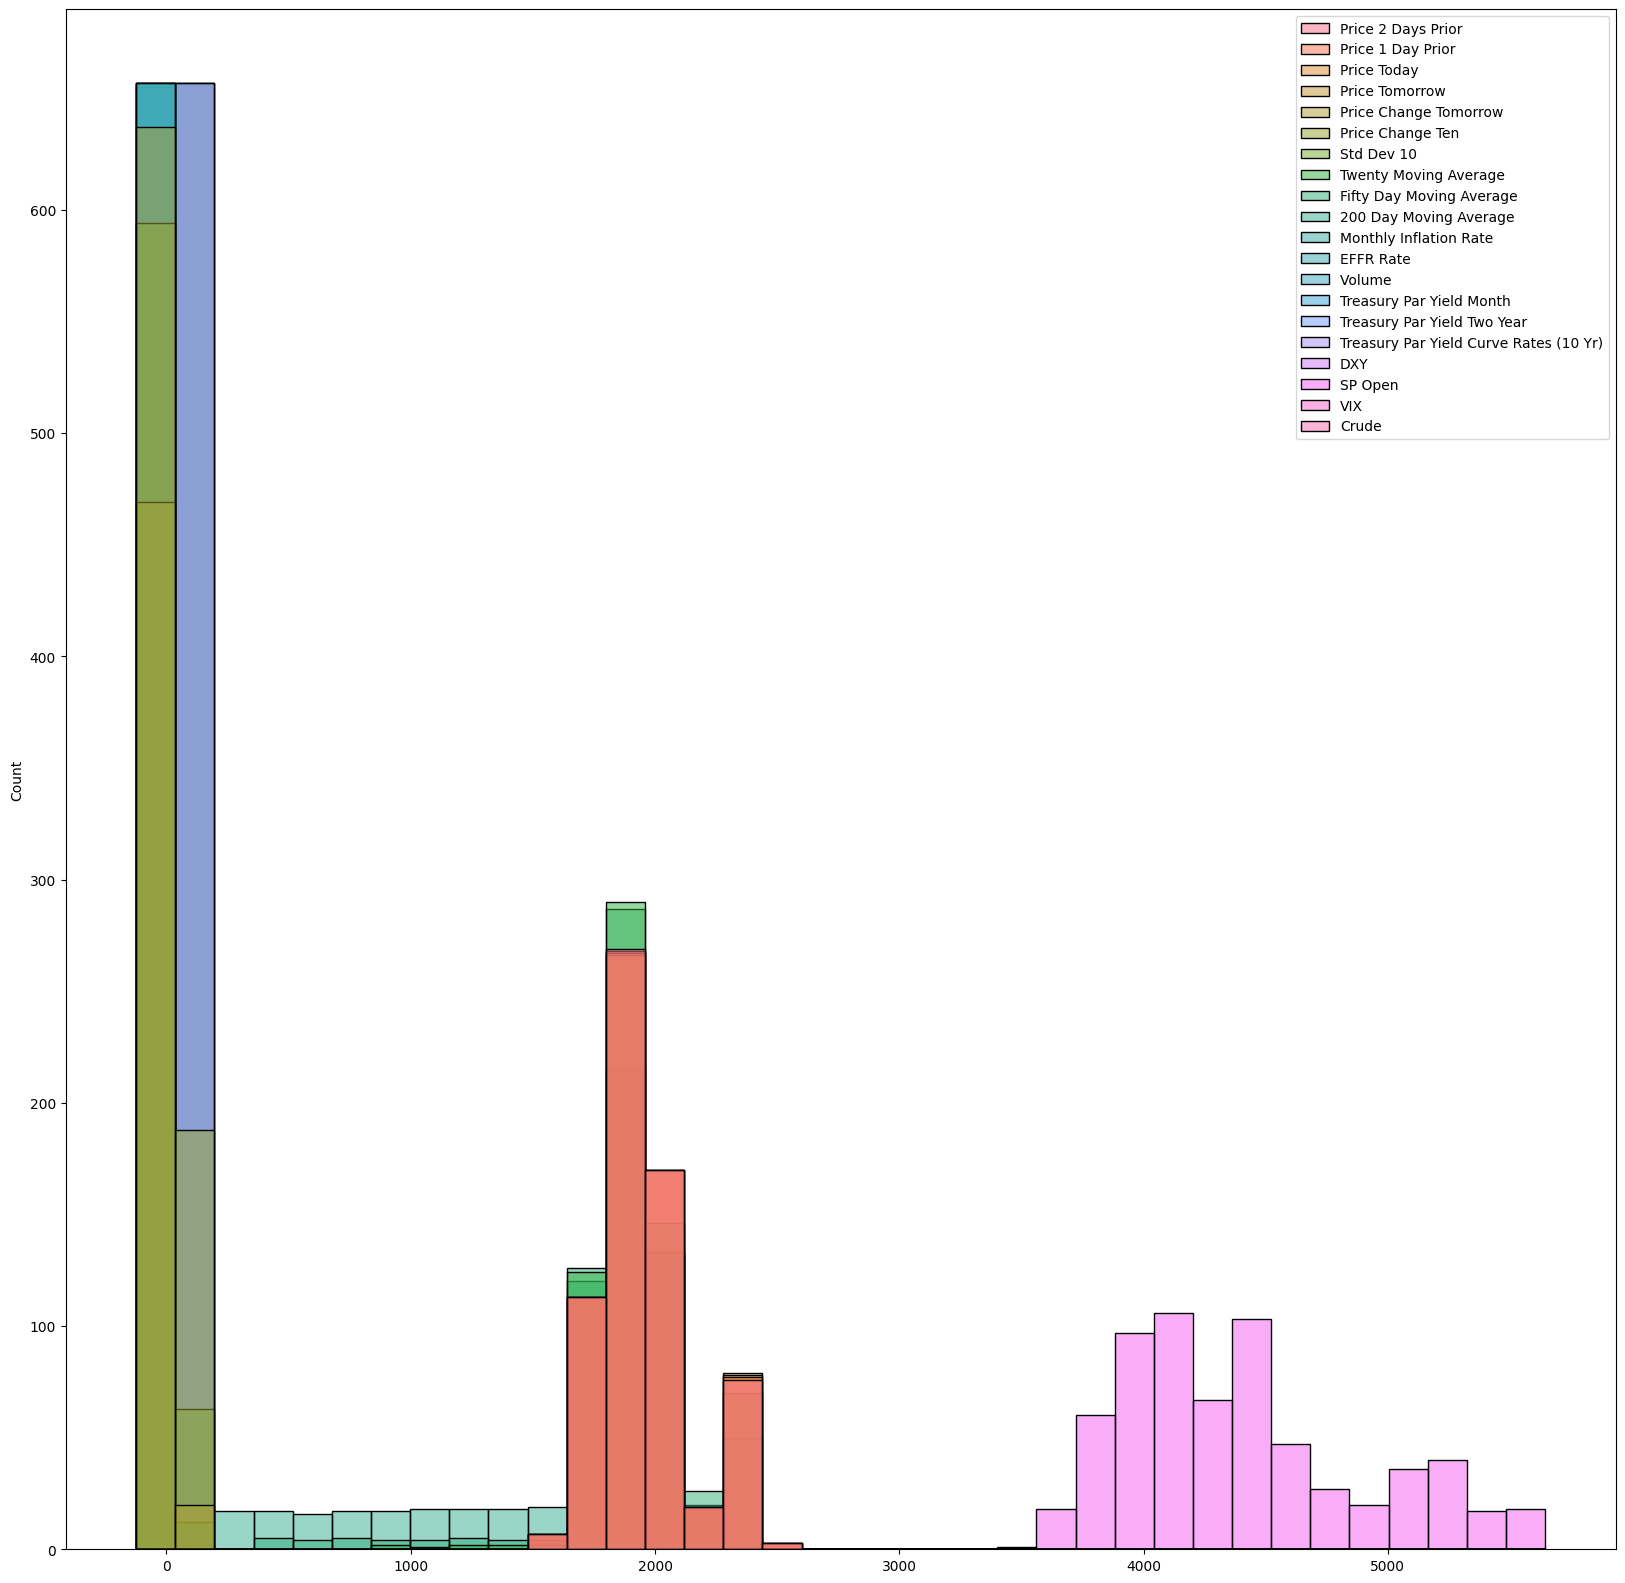

In [12]:
plt.figure(figsize=(20,20))
sns.histplot(data=df)
plt.show()

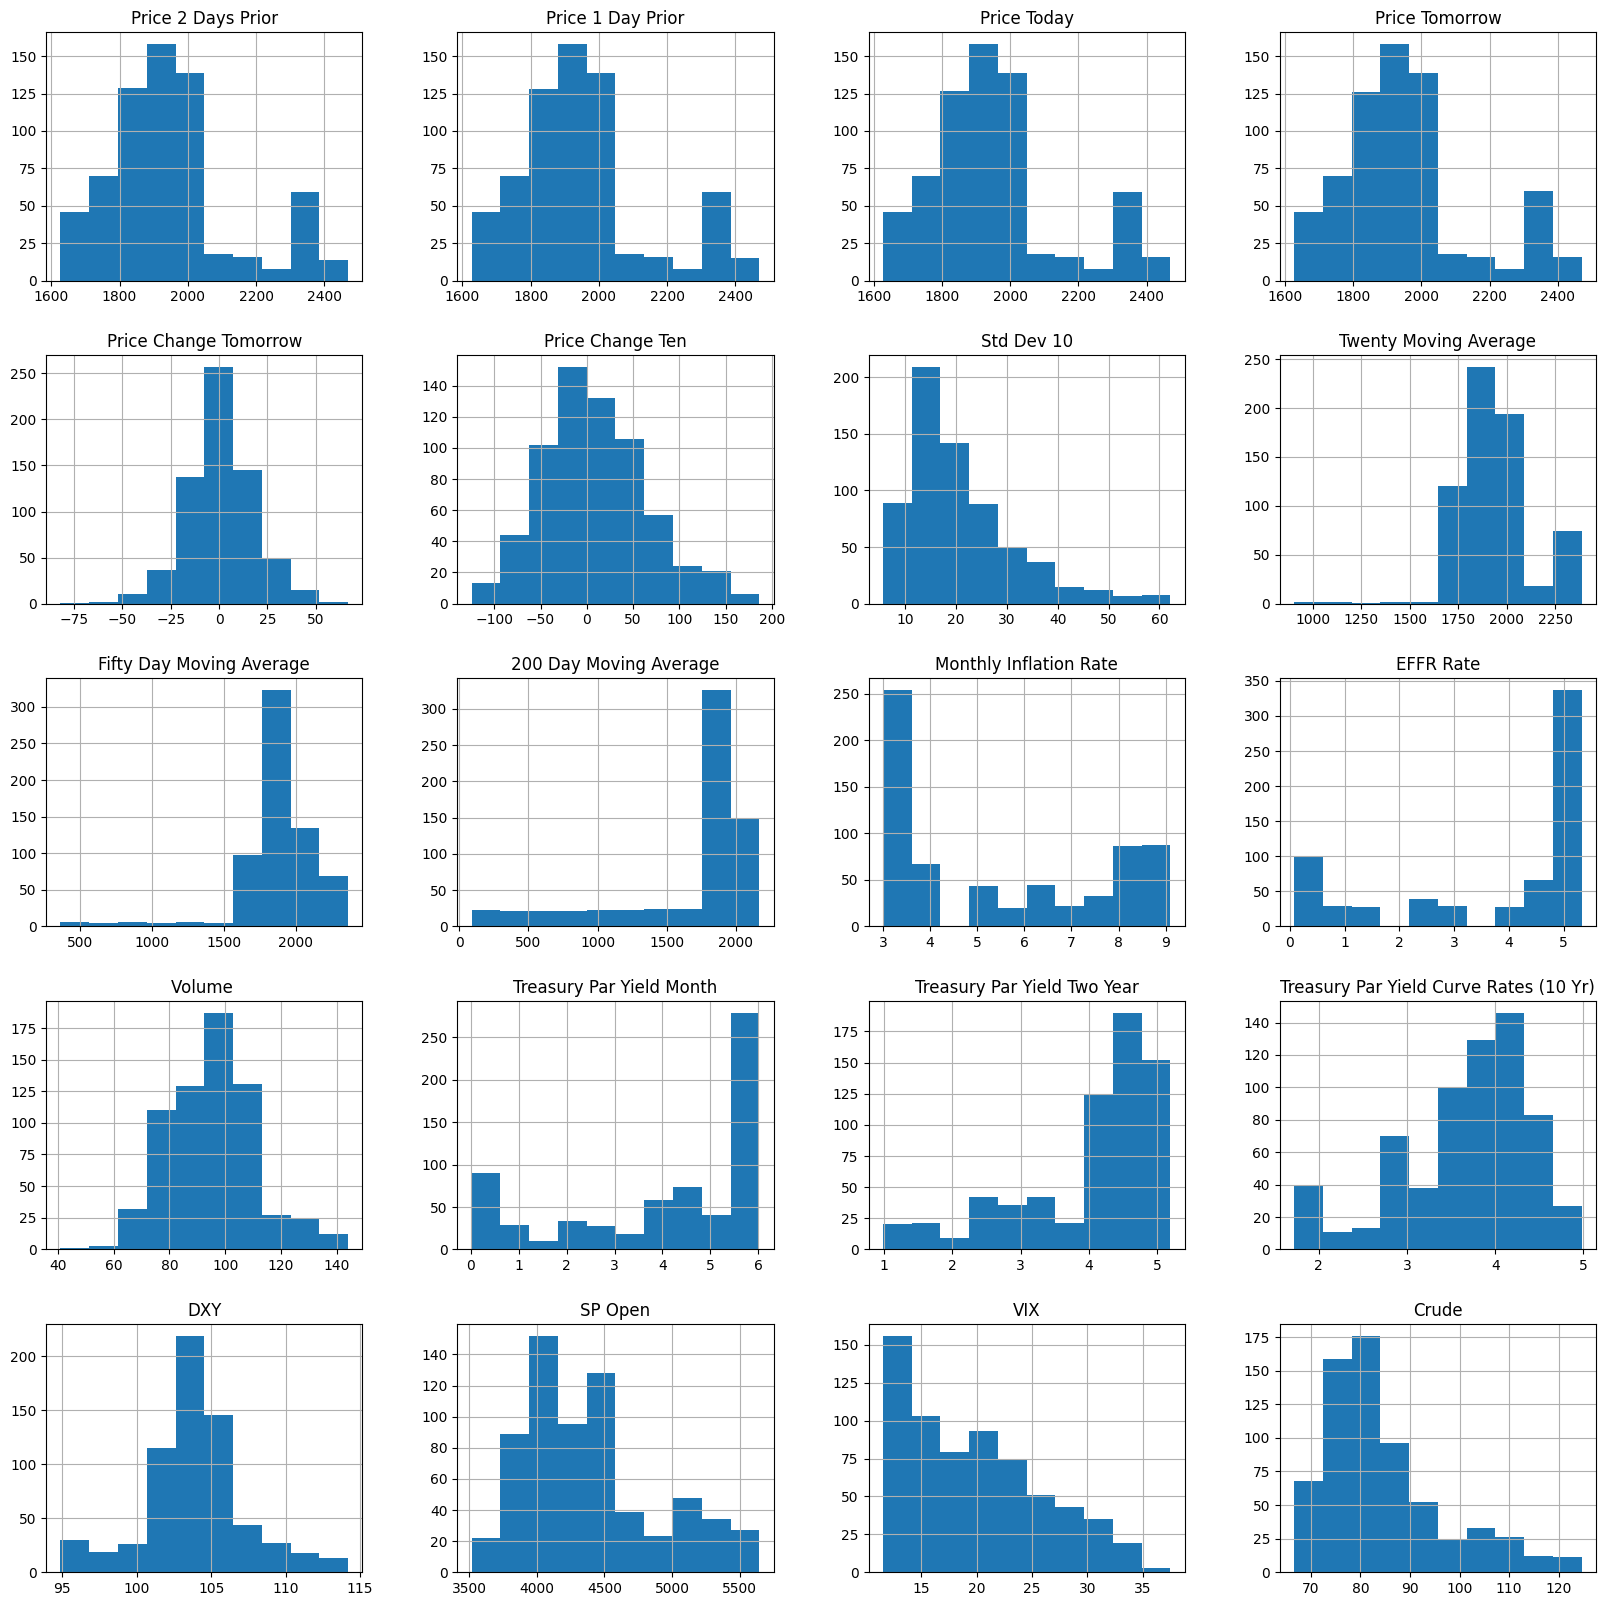

In [13]:
data_plot = df.hist(figsize=(20, 20))
data_plot
plt.show()

In [14]:
# plt.figure(figsize=(30,15))
# sns.boxplot(data=df, notch=False)
# plt.title('Data Distribution')
# l=list(np.arange(20))
# plt.xticks(l, list( df.columns),rotation=90)
# plt.show()

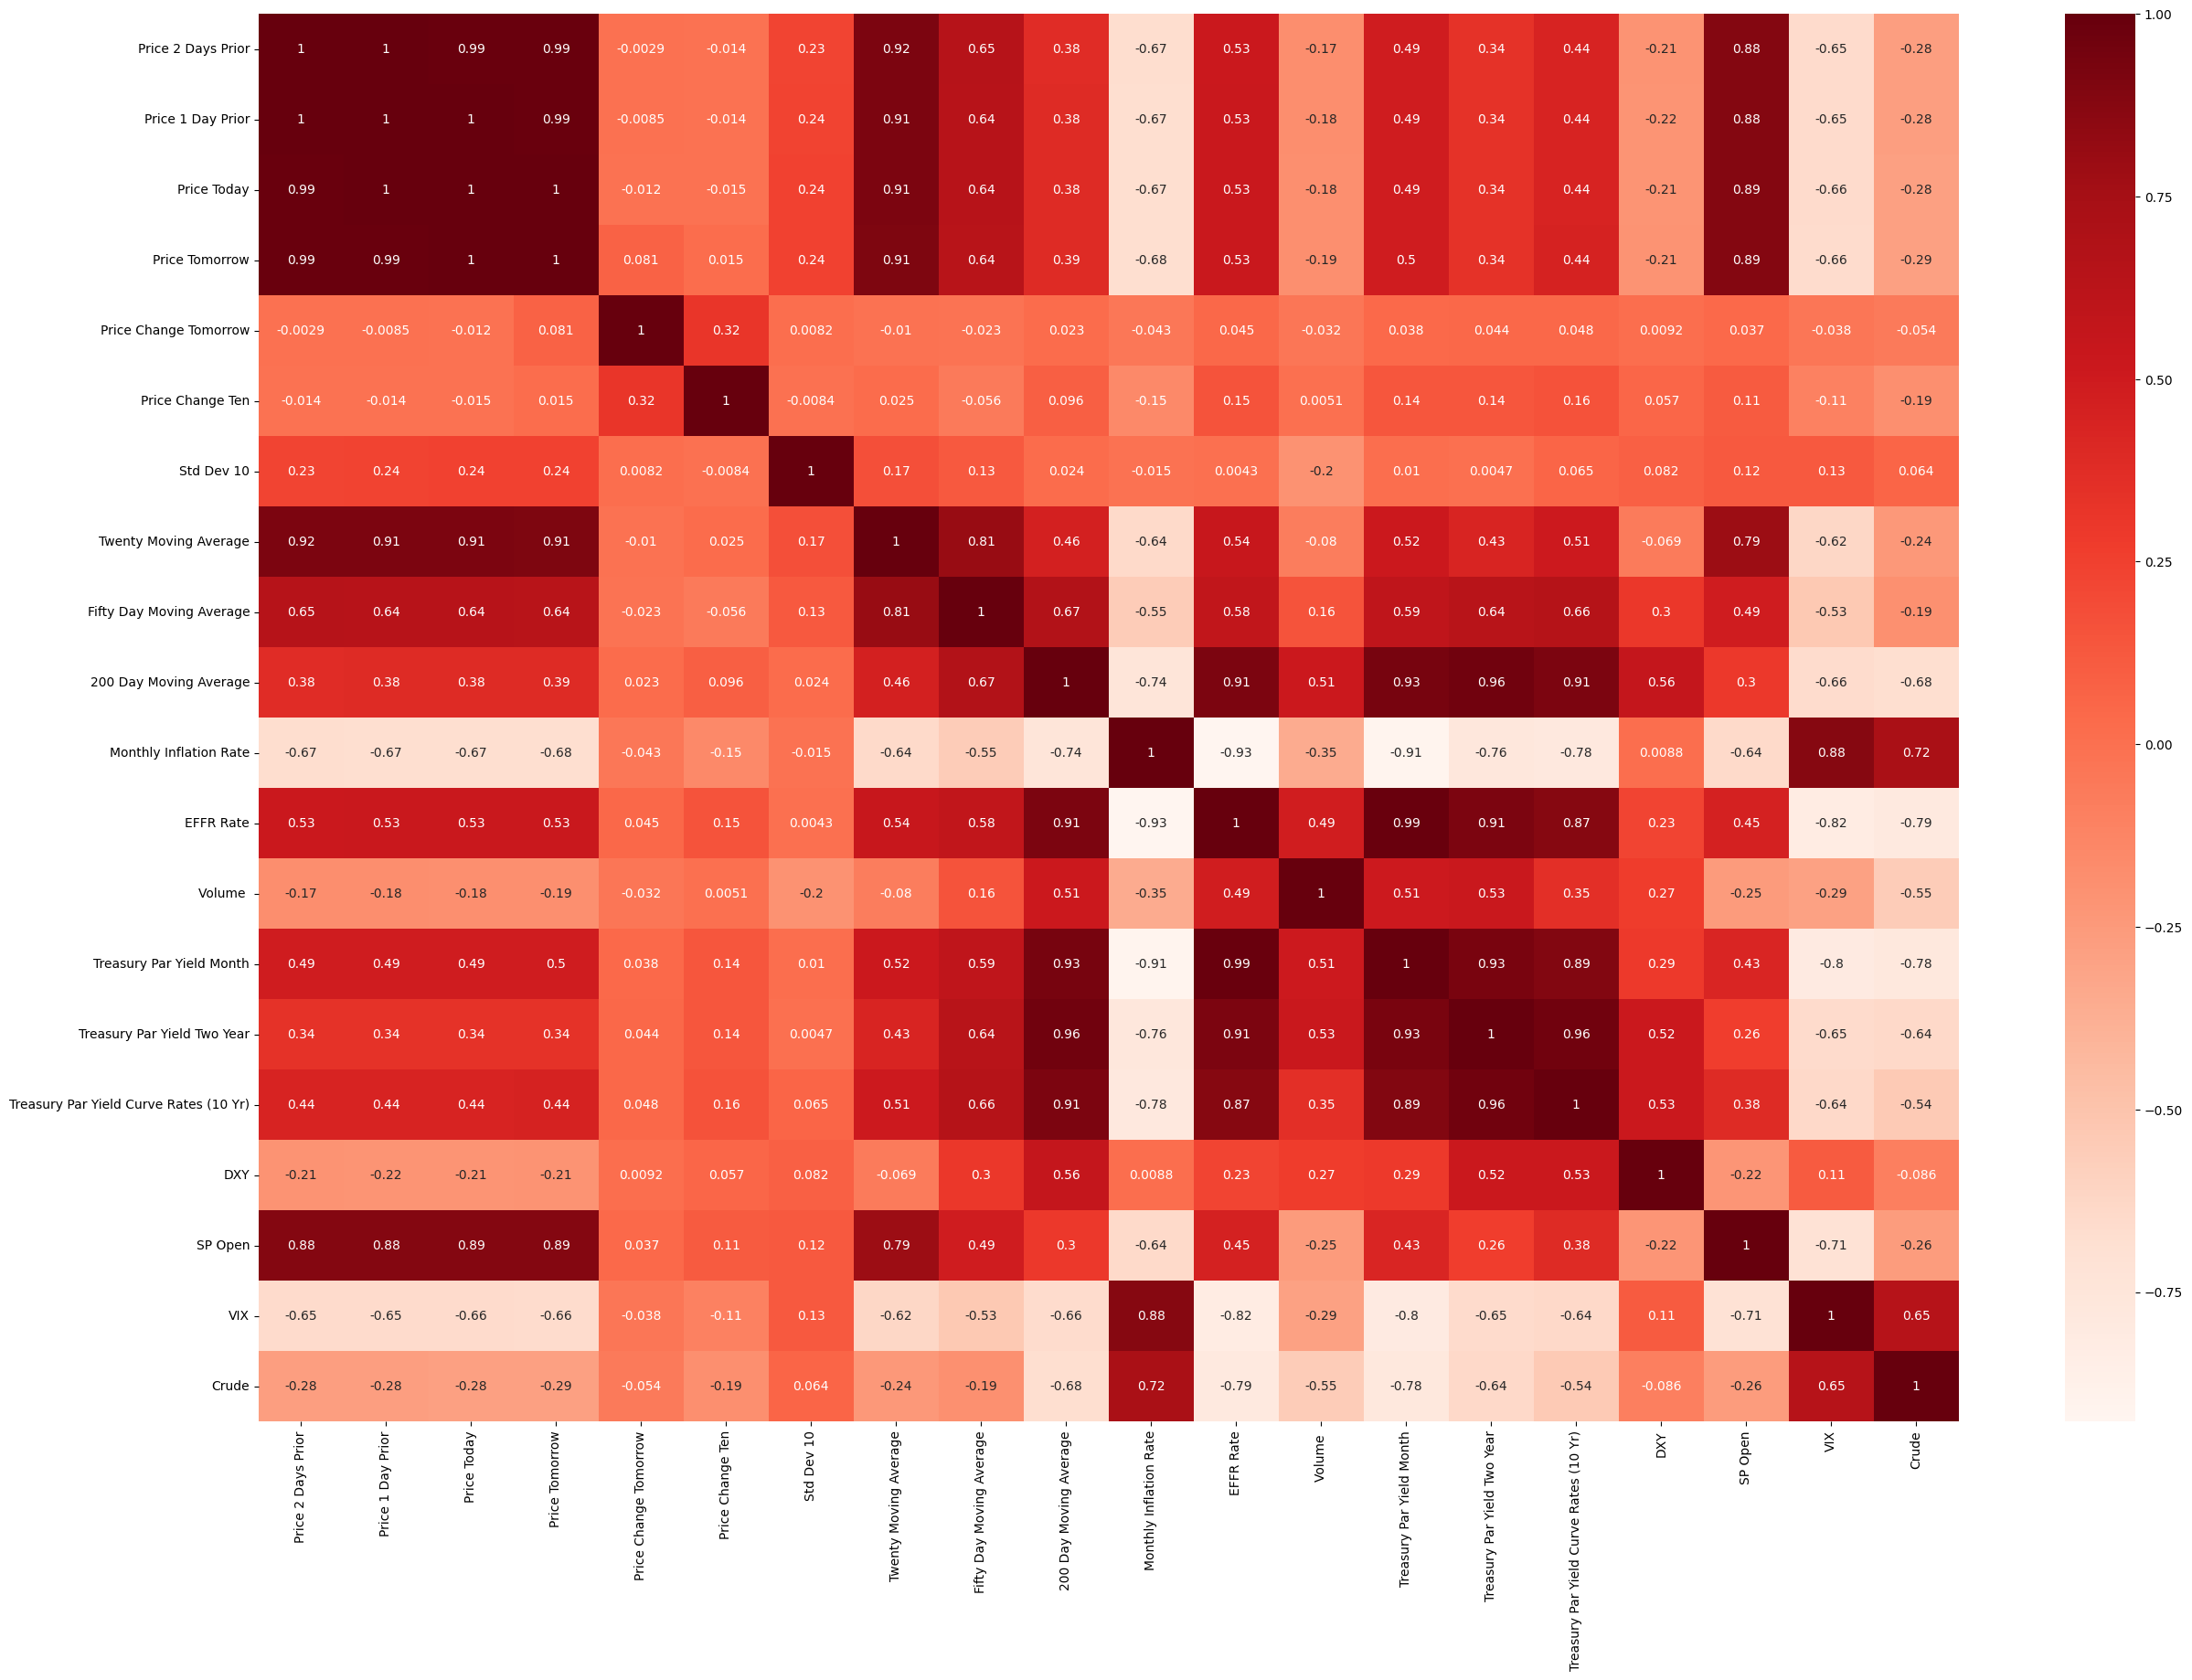

In [15]:
df_heatmap = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(df_heatmap, annot=True, cmap='Reds')
plt.show()

# Useing LazyPredict 

In [16]:
X = df.drop("Price Tomorrow",axis=1)
y = df["Price Tomorrow"]

In [17]:
sta = StandardScaler()
X = sta.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape

((525, 19), (132, 19))

In [20]:
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:06<00:00,  6.31it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2765
[LightGBM] [Info] Number of data points in the train set: 525, number of used features: 19
[LightGBM] [Info] Start training from score 1944.456724
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

# Evaluation & Visualization LazyRegressor

In [21]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
BayesianRidge,1.00,1.00,0.00,0.06
LassoLarsIC,1.00,1.00,0.00,0.05
TransformedTargetRegressor,1.00,1.00,0.00,0.01
Lars,1.00,1.00,0.00,0.06
LinearRegression,1.00,1.00,0.00,0.07
OrthogonalMatchingPursuitCV,1.00,1.00,0.00,0.07
RANSACRegressor,1.00,1.00,0.00,0.08
LassoLarsCV,1.00,1.00,0.00,0.07
HuberRegressor,1.00,1.00,0.07,0.19


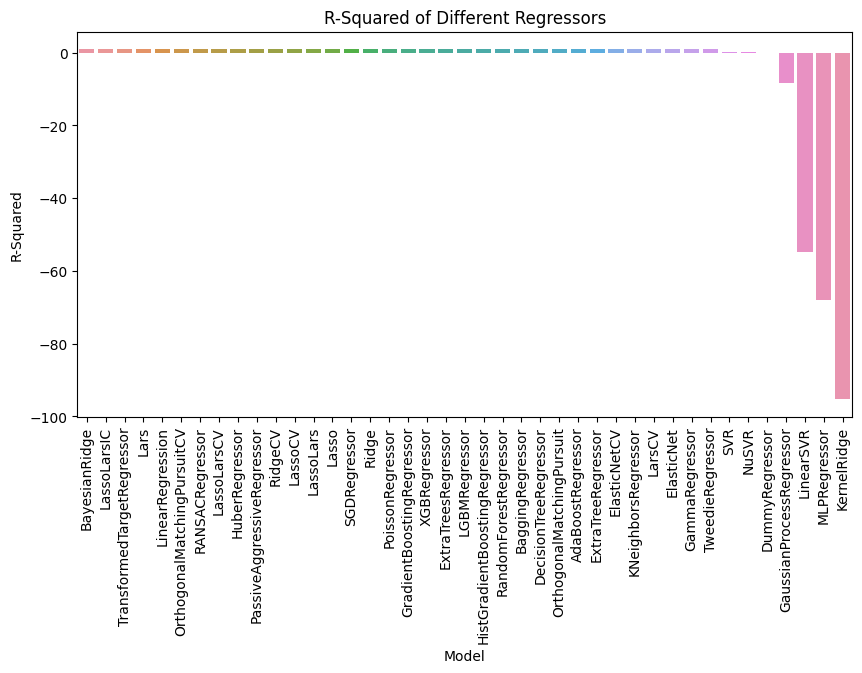

In [22]:
# Visualization of the R-Squared

plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='R-Squared', data=models)
plt.xticks(rotation=90)
plt.title('R-Squared of Different Regressors')
plt.show()



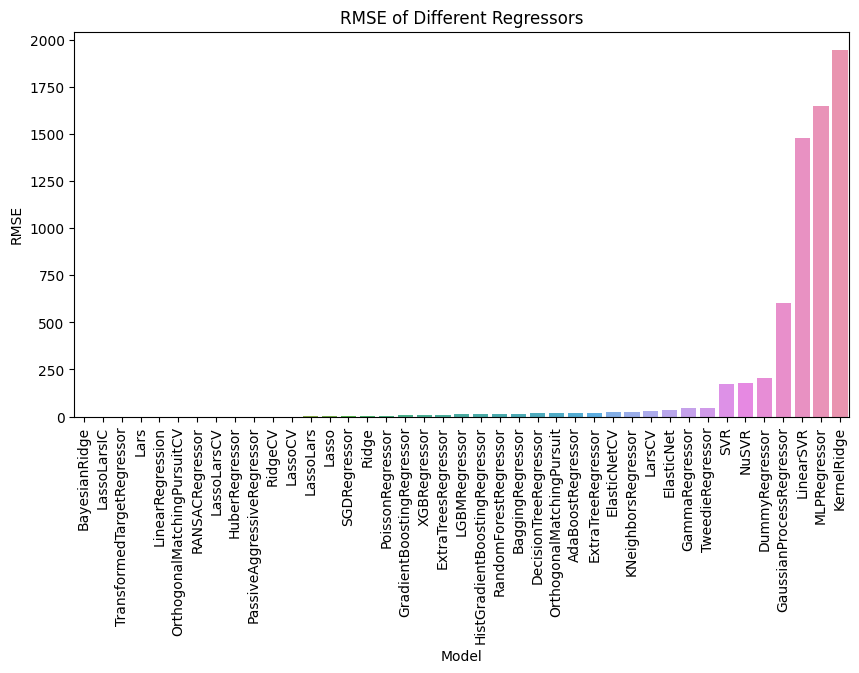

In [23]:
# Visualization of the RMSE

plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='RMSE', data=models)
plt.xticks(rotation=90)
plt.title('RMSE of Different Regressors')
plt.show()

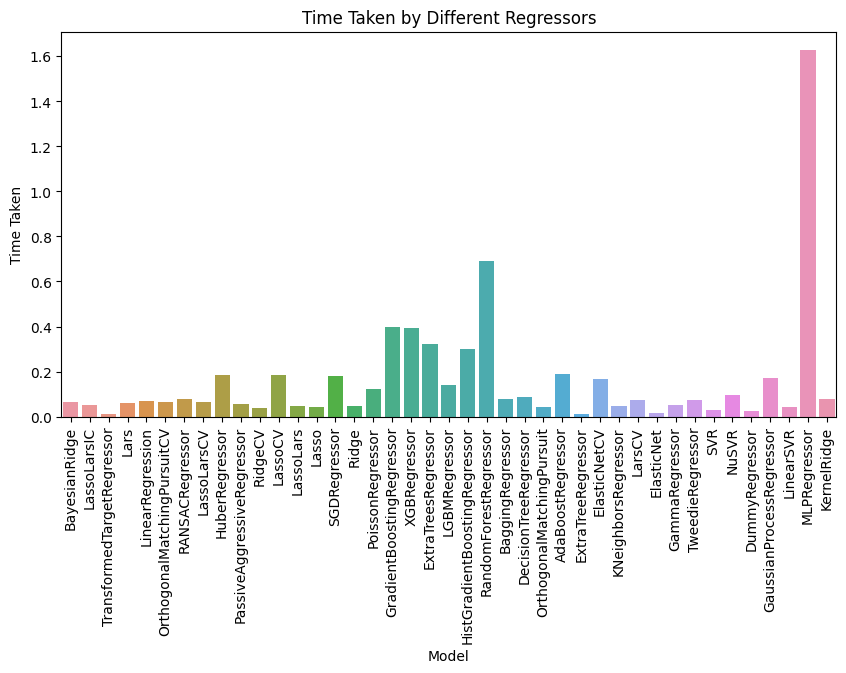

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=models.index, y='Time Taken', data=models)
plt.xticks(rotation=90)
plt.title('Time Taken by Different Regressors')
plt.show()

In [25]:
# Select the best model based on R-Squared and RMSE
# You can adjust this logic based on your specific needs
best_model_name = models.sort_values(by=['R-Squared', 'RMSE'], ascending=[False, True]).index[0]
best_model_metrics = models.loc[best_model_name]

print(f"Best Model: {best_model_name}")
print(best_model_metrics)


Best Model: OrthogonalMatchingPursuitCV
Adjusted R-Squared   1.00
R-Squared            1.00
RMSE                 0.00
Time Taken           0.07
Name: OrthogonalMatchingPursuitCV, dtype: float64
